In [1]:
import pandas as pd # import for working with a data frame
import numpy as np # import for working with scientific calculations
import matplotlib.pyplot as plt # import for drawing basic graps

 # draw graph in notebook
%matplotlib inline

In [2]:
#create df
df_movies = pd.read_csv(r"C:\Users\Jay\Documents\FlatironDataSci\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\mySubmit\IMDB-Movie-Data.csv", encoding = "ISO-8859-1")
#preview data
df_movies.head()
#print("moviesDF:\n\n{}\n".format(df_movies.head()))

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
df_movies['Genre']

0         Action,Adventure,Sci-Fi
1        Adventure,Mystery,Sci-Fi
2                 Horror,Thriller
3         Animation,Comedy,Family
4        Action,Adventure,Fantasy
5        Action,Adventure,Fantasy
6              Comedy,Drama,Music
7                          Comedy
8      Action,Adventure,Biography
9         Adventure,Drama,Romance
10       Adventure,Family,Fantasy
11        Biography,Drama,History
12        Action,Adventure,Sci-Fi
13     Animation,Adventure,Comedy
14            Action,Comedy,Drama
15     Animation,Adventure,Comedy
16        Biography,Drama,History
17                Action,Thriller
18                Biography,Drama
19           Drama,Mystery,Sci-Fi
20       Adventure,Drama,Thriller
21                          Drama
22             Crime,Drama,Horror
23     Animation,Adventure,Comedy
24        Action,Adventure,Sci-Fi
25                         Comedy
26         Action,Adventure,Drama
27                Horror,Thriller
28                         Comedy
29         Act

In [13]:
df_movies.groupby('Genre')['Revenue (Millions)'].sum().nlargest(3)

Genre
Action,Adventure,Sci-Fi       10461.51
Animation,Adventure,Comedy     5754.75
Action,Adventure,Fantasy       5248.29
Name: Revenue (Millions), dtype: float64

In [14]:

df_action = df_movies.query('Genre == "Action"').groupby('Year')['Revenue (Millions)'].sum()
df_action = df_action.rolling(window=10).mean()
df_action

Year
1970-01-01 00:00:00.000002016   NaN
Name: Revenue (Millions), dtype: float64

In [20]:
df_adventure = df_movies.query('Genre == "Adventure"').groupby('Year')['Revenue (Millions)'].sum()
df_adventure = df_adventure.rolling(window=10).mean()
df_adventure 

Year
1970-01-01 00:00:00.000002016   NaN
Name: Revenue (Millions), dtype: float64

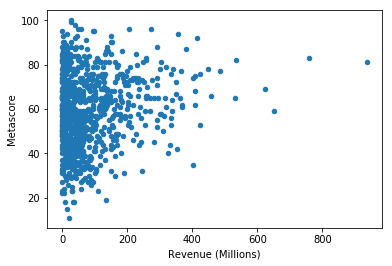

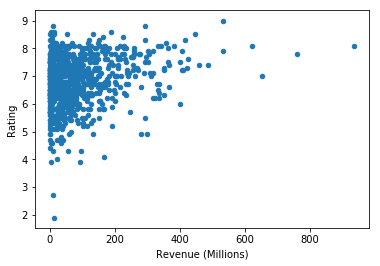

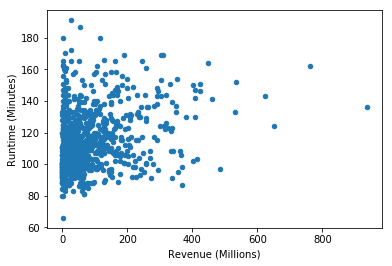

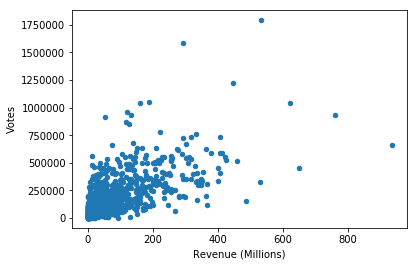

In [28]:
df_movies.plot.scatter(x='Revenue (Millions)',y='Metascore');
df_movies.plot.scatter(x='Revenue (Millions)',y='Rating');
df_movies.plot.scatter(x='Revenue (Millions)',y='Runtime (Minutes)');
df_movies.plot.scatter(x='Revenue (Millions)',y='Votes');

In [32]:
df_cast = df_movies[['Actors','Year','Revenue (Millions)']]
df_cast.dropna()
df_cast.plot()

ValueError: view limit minimum -35958.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000016BD94896A8> (for post_execute):


ValueError: view limit minimum -35958.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -35958.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [51]:
df_cast = df_cast.ix[df_cast.groupby(['Year'])['Revenue (Millions)'].idxmax()]
df_cast

C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


KeyError: 'Year'

In [53]:
df_cast.plot(kind='bar', stacked=True, colormap='autumn')

TypeError: Empty 'DataFrame': no numeric data to plot